# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load Dataset

In [5]:
sales = pd.read_csv("Advertising.csv")

In [6]:
sales.head()

,id,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
 sales.shape

(200, 5)

In [9]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [11]:
sales.describe()

,id,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


1) Highest Expense spends on TV
2) Lowest Expense spends on Radio
3) Maximum Sales is 27
4) Lowest Sales is 1.60

In [25]:
print("Highest Advertising Cost spend  on TV:",sales["TV"].max())
print("Highest Advertising Cost spend  on Newspaper:",sales["Newspaper"].max())
print("Highest Advertising Cost spend  on Radio:",sales["Radio"].max())

Highest Advertising Cost spend  on TV: 296.4
Highest Advertising Cost spend  on Newspaper: 114.0
Highest Advertising Cost spend  on Radio: 49.6


In [26]:
print("Total Advertising Cost spend  on TV:",sales["TV"].sum())
print("Total Advertising Cost spend  on Newspaper:",sales["Newspaper"].sum())
print("Total Advertising Cost spend  on Radio:",sales["Radio"].sum())

Total Advertising Cost spend  on TV: 29408.5
Total Advertising Cost spend  on Newspaper: 6110.799999999999
Total Advertising Cost spend  on Radio: 4652.800000000001


# Data Visualization

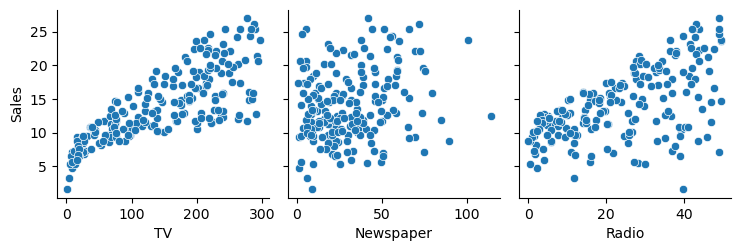

In [67]:
sns.pairplot(sales, x_vars = ["TV", "Newspaper","Radio"], y_vars = ["Sales"] , kind = "scatter")

1. TV Sales Increases As Adverting Cost Inceasing
2. As the plot is scattered for radio and newspaper so the predicton is difficult

<Axes: >

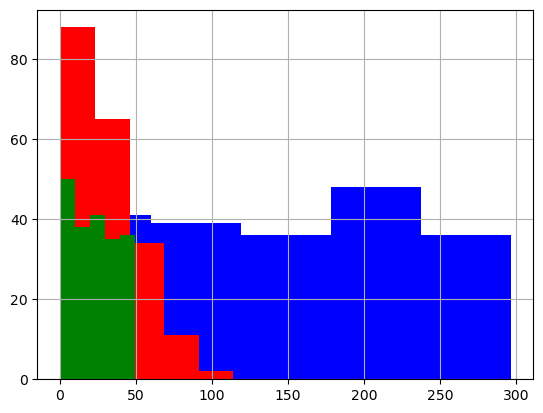

In [31]:
%matplotlib inline
sales["TV"].hist(bins = 5, color = "blue")
sales["Newspaper"].hist(bins = 5, color = "red")
sales["Radio"].hist(bins = 5, color = "green")

<function matplotlib.pyplot.show(close=None, block=None)>

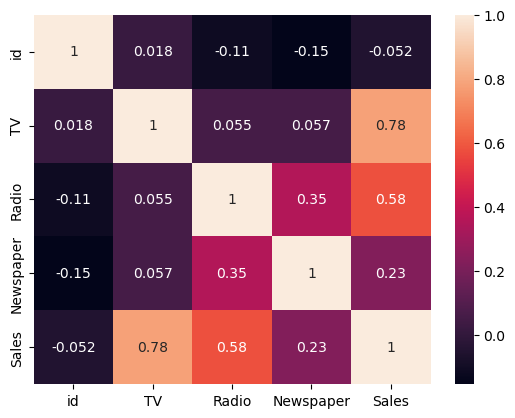

In [32]:
sns.heatmap(sales.corr(), annot=True)
plt.show

Sales are highly correlated with the TV

# Model Evaluation

In [50]:
X_train,X_test,Y_Train,Y_test = train_test_split(sales[["TV"]], sales[["Sales"]], test_size = 0.2,random_state = 0)
print( X_train.shape, Y_test.shape)

(160, 1) (40, 1)


In [51]:
model = LinearRegression()
model.fit(X_train, Y_Train)

LinearRegression()

In [53]:
pred = model.predict(X_test)
print(pred)

[[10.47623281]
 [ 9.59288325]
 [11.45159795]
 [20.62095042]
 [15.12301956]
 [ 9.87813155]
 [ 7.69276154]
 [18.33896406]
 [ 8.38747917]
 [16.383633  ]
 [19.3143292 ]
 [11.30437303]
 [14.49731363]
 [15.93275666]
 [10.8074889 ]
 [12.82263008]
 [19.51216269]
 [ 7.32469923]
 [10.72927566]
 [17.11055607]
 [20.52433406]
 [13.74738665]
 [15.34845773]
 [13.35171966]
 [ 9.75391052]
 [12.95605267]
 [14.91138373]
 [16.72409064]
 [17.59823864]
 [ 8.44728929]
 [10.41182191]
 [16.44344313]
 [20.20688032]
 [18.41257652]
 [ 7.8997966 ]
 [ 8.15283944]
 [10.03455803]
 [15.61070213]
 [10.43942658]
 [ 8.44268851]]


In [56]:
print(Y_test)

     Sales
18    11.3
170    8.4
107    8.7
98    25.4
177   11.7
182    8.7
5      7.2
146   13.2
12     9.2
152   16.6
61    24.2
125   10.6
180   10.5
154   15.6
80    11.8
7     13.2
33    17.4
130    1.6
37    14.7
74    17.0
183   26.2
145   10.3
45    14.9
159   12.9
60     8.1
123   15.2
179   12.6
185   22.6
122   11.6
44     8.5
16    12.5
55    23.7
150   16.1
111   21.8
22     5.6
189    6.7
129    9.7
4     12.9
83    13.6
106    7.2


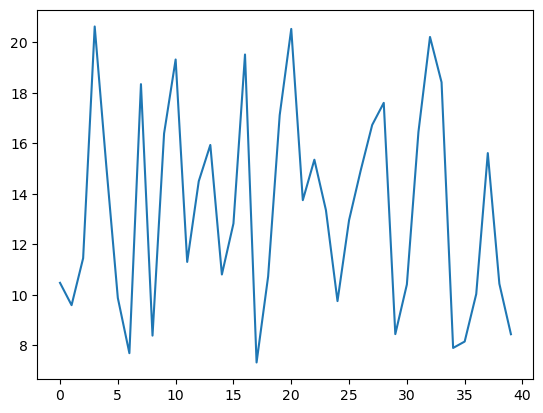

In [57]:
plt.plot(pred)

In [61]:
model.coef_

array([[0.0529375]])

In [64]:
model.intercept_

array([6.19440086])

In [65]:
0.0529375*69.2+6.19440086

9.85767586

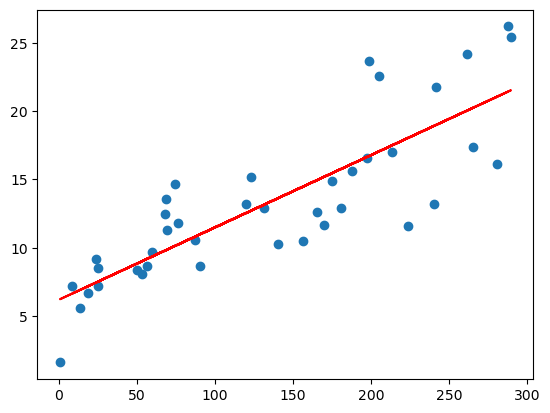

In [66]:
plt.scatter(X_test,Y_test)
plt.plot(X_test, 6.19440086 +  0.0529375 * X_test , "r" )
plt.show()

# Conclusion: 
The above solution is succesfully able to predict advertding sales
